<a href="https://colab.research.google.com/github/audreyemmely/computer-vision/blob/main/visaocomp_lista4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Resolução Lista 4**
---

ARQUIMEDES VINÍCIUS PEREIRA DE FRANÇA MOURA

AUDREY EMMELY RODRIGUES VASCONCELOS



## Instalação do opencv

In [1]:
# !pip install opencv-python==4.4.0.44
# !pip install opencv-contrib-python==4.4.0.44

## Importando bibliotecas

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import io

## Questão 1

Leia o seguinte tutorial de calibração de câmera:
https://docs.opencv.org/4.5.2/dc/dbb/tutorial_py_calibration.html

Adapte o código do tutorial e implemente um programa que funcione
o mais próximo possível do tempo real com imagens adquiridas por uma
webcam ou smartphone. Você vai precisar de um tabuleiro de xadrez (pode
imprimir numa folha A4, e colar num papelão ou emplastificar para a geometria ficar fixa). Exiba na tela a rotação e translação da câmera em tempo real, enquanto varia a posição da câmera, mantendo o tabuleiro sempre visível na
imagem. Salve o vídeo e o print da tela.


## Questão 2

Pesquise qual o método usado pela OpenCV para calcular a calibração de câmera e escreva um breve resumo deste método em até 15 linhas.

O método utilizado é baseado no artigo desenvolvido por Zhengyou Zhang. O método consiste em basicamente 2 etapas. Na primeira, ele utiliza duas restrições básicas dos parâmetros intrísecos quando utilizado uma homografia. A homografia $H$ é estimada utilizando uma associação entre os pontos no plano do modelo com os pontos no plano da imagem. Ele utiliza uma estimativa por máxima verossimilhança ao minimizar a diferença entre os pares de pontos desses planos utilizando os valores da homografia. A minimização é feita usando o algoritmo de Levenberg-Marquardt. Com essas restrições básicas dos parâmetros intrínsecos utilizando $H$, ele consegue achar os valores da matriz $B$ que é formada pelas propriedades intrísecas da câmera. Com essas propriedades intrísecas e a homografia estimadas $H$, ele consegue achar as propriedades extrínsicas da câmera (translação e rotação). A próxima etapa consiste em refinar este resultado utilizando uma inferência por máxima verossimilhança. Isso é feito ao minimizar a diferença entre um ponto $m$ da imagem e a projeção $\tilde{m}$ de um ponto $M$ do mundo real.

## Questão 3

As fotografias em modo retrato se popularizaram nos últimos anos.
Elas consistem em segmentar foreground e background em uma fotografia, e
borrar o background, simulando o efeito de uma câmera DLSR, como na
imagem abaixo.

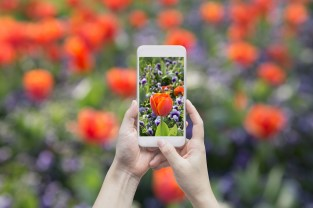

O objetivo dessa questão é simular este efeito, usando mapas de disparidade gerados por duas imagens. Para um tutorial de como gerar mapas de disparidade usando OpenCV, veja https://docs.opencv.org/4.5.2/dd/d53/tutorial_py_depthmap.html. Após a aquisição do mapa de disparidade, você deve usá-lo adequadamente para detectar o foreground, aplicar um filtro gaussiano para borrar apenas o background, e combinar as duas partes para obter um efeito como na figura acima. Experimente seu algoritmo em três pares de imagens adquiridas através de pequenas variações de ponto de vista da câmera.

In [3]:
img1L = cv.imread('/content/tsukuba_L.png',0)
img1R = cv.imread('/content/tsukuba_R.png',0)

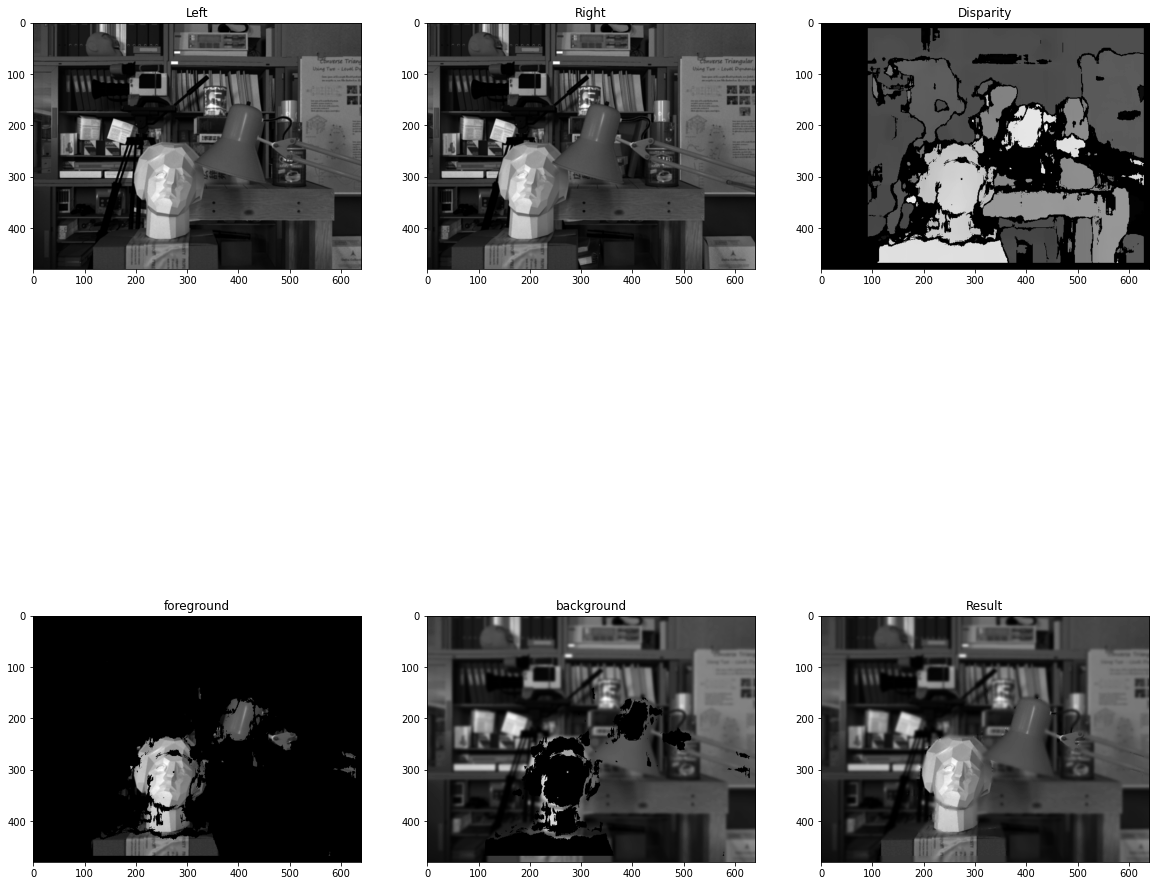

In [4]:
stereo = cv.StereoBM_create(numDisparities=80, blockSize=25)  
disparity = stereo.compute(img1L,img1R)
disparity = cv.normalize(disparity,  disparity, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)

ret,threshFore = cv.threshold(disparity,175,255,cv.THRESH_BINARY) 
ret,threshBack = cv.threshold(disparity,175,255,cv.THRESH_BINARY_INV)

threshFore = cv.normalize(threshFore,  threshFore, 0.0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_8U)
threshBack = cv.normalize(threshBack,  threshBack, 0.0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_8U)

blurredBG = cv.GaussianBlur(img1L,(13,13),sigmaX=0) 
foreground = cv.bitwise_and(img1L, img1L, mask=threshFore)
background = cv.bitwise_and(blurredBG, blurredBG, mask=threshBack)

full = foreground + background

f, axs = plt.subplots(2,3,figsize=(20,20))
axs[0][0].imshow(cv.cvtColor(img1L,cv.COLOR_BGR2RGB))
axs[0][0].set_title('Left')
axs[0][1].imshow(cv.cvtColor(img1R,cv.COLOR_BGR2RGB))
axs[0][1].set_title('Right')
axs[0][2].imshow(disparity, cmap='gray')
axs[0][2].set_title('Disparity')
axs[1][0].imshow(foreground, cmap='gray')
axs[1][0].set_title('foreground')
axs[1][1].imshow(background, cmap='gray')
axs[1][1].set_title('background')
axs[1][2].imshow(full, cmap='gray')
axs[1][2].set_title('Result')

plt.show()

In [5]:
img2L = cv.imread('/content/tsukuba2_L.png',0)
img2R = cv.imread('/content/tsukuba2_R.png',0)

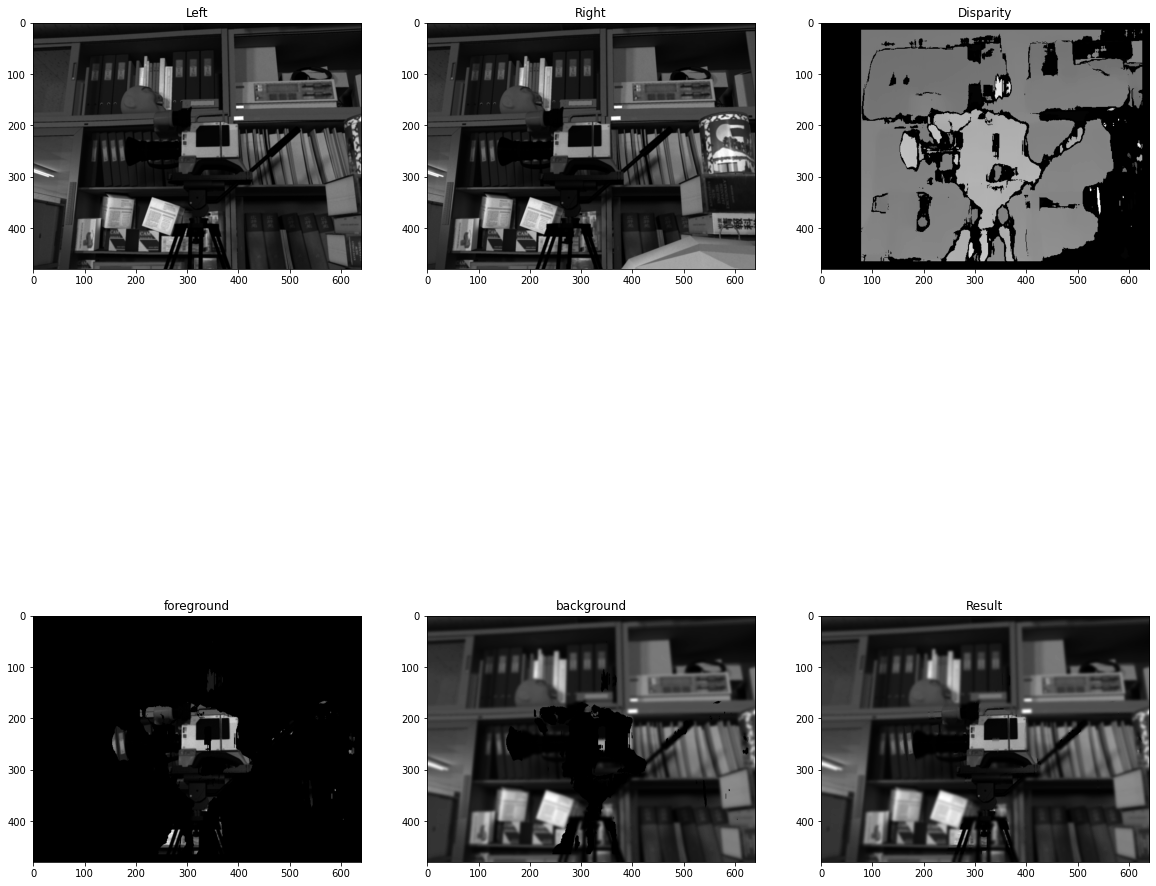

In [6]:
stereo = cv.StereoBM_create(numDisparities=64, blockSize=31)
disparity = stereo.compute(img2L,img2R)
disparity = cv.normalize(disparity,  disparity, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)

ret,threshFore = cv.threshold(disparity,150,255,cv.THRESH_BINARY) 
ret,threshBack = cv.threshold(disparity,150,255,cv.THRESH_BINARY_INV) 

threshFore = cv.normalize(threshFore,  threshFore, 0.0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_8U)
threshBack = cv.normalize(threshBack,  threshBack, 0.0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_8U)

blurredBG = cv.GaussianBlur(img2L,(13,13),sigmaX=0) 
foreground = cv.bitwise_and(img2L, img2L, mask=threshFore)
background = cv.bitwise_and(blurredBG, blurredBG, mask=threshBack)

full = foreground + background

f, axs = plt.subplots(2,3,figsize=(20,20))
axs[0][0].imshow(cv.cvtColor(img2L,cv.COLOR_BGR2RGB))
axs[0][0].set_title('Left')
axs[0][1].imshow(cv.cvtColor(img2R,cv.COLOR_BGR2RGB))
axs[0][1].set_title('Right')
axs[0][2].imshow(disparity, cmap='gray')
axs[0][2].set_title('Disparity')
axs[1][0].imshow(foreground, cmap='gray')
axs[1][0].set_title('foreground')
axs[1][1].imshow(background, cmap='gray')
axs[1][1].set_title('background')
axs[1][2].imshow(full, cmap='gray')
axs[1][2].set_title('Result')

plt.show()

In [7]:
img3L = cv.imread('/content/tsukuba3_L.png',0)
img3R = cv.imread('/content/tsukuba3_R.png',0)

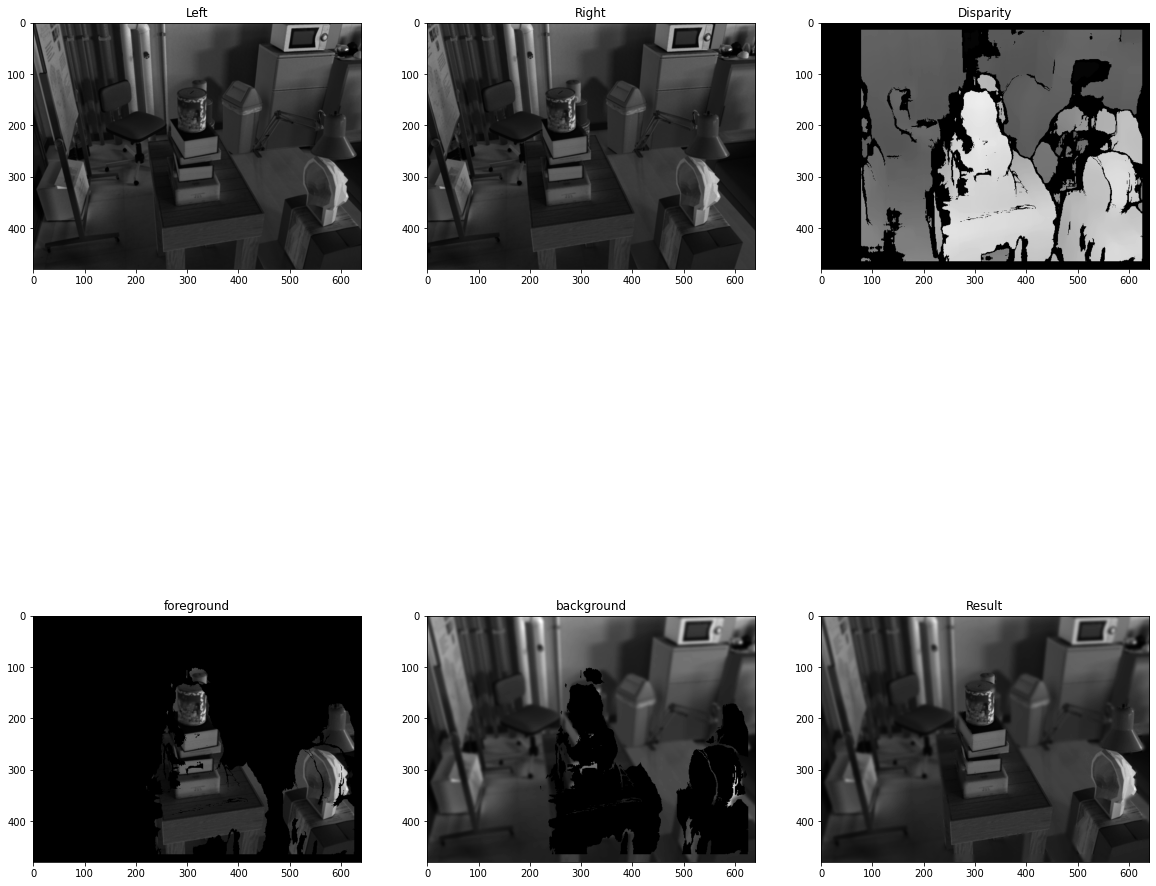

In [8]:
stereo = cv.StereoBM_create(numDisparities=64, blockSize=31)
disparity = stereo.compute(img3L,img3R)
disparity = cv.normalize(disparity,  disparity, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)

ret,threshFore = cv.threshold(disparity,180,255,cv.THRESH_BINARY)
ret,threshBack = cv.threshold(disparity,180,255,cv.THRESH_BINARY_INV) 

threshFore = cv.normalize(threshFore,  threshFore, 0.0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_8U)
threshBack = cv.normalize(threshBack,  threshBack, 0.0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_8U)

blurredBG = cv.GaussianBlur(img3L,(13,13),sigmaX=0)
foreground = cv.bitwise_and(img3L, img3L, mask=threshFore)
background = cv.bitwise_and(blurredBG, blurredBG, mask=threshBack)

full = foreground + background

f, axs = plt.subplots(2,3,figsize=(20,20))
axs[0][0].imshow(cv.cvtColor(img3L,cv.COLOR_BGR2RGB))
axs[0][0].set_title('Left')
axs[0][1].imshow(cv.cvtColor(img3R,cv.COLOR_BGR2RGB))
axs[0][1].set_title('Right')
axs[0][2].imshow(disparity, cmap='gray')
axs[0][2].set_title('Disparity')
axs[1][0].imshow(foreground, cmap='gray')
axs[1][0].set_title('foreground')
axs[1][1].imshow(background, cmap='gray')
axs[1][1].set_title('background')
axs[1][2].imshow(full, cmap='gray')
axs[1][2].set_title('Result')

plt.show()